# 쇼핑 모델링 최종(3개월)

## 라이브러리 호출

In [1]:
import os
os.chdir("C:/Users/sim/Desktop/BAF/1학기 프로젝트")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

import nltk
import re

## train 데이터 불러오기

In [2]:
train = pd.read_csv('./Online Retail_2009.csv')

In [3]:
# pivot_CS
df_CS = pd.DataFrame(train.loc[:,['CustomerID','StockCode']].value_counts())
df_CS[0] = 1
display(df_CS)
pivot_CS = df_CS.pivot_table(0, index='CustomerID', columns='StockCode')
#display(pivot_CS)
pivot_CS.fillna(0, inplace=True)
display(pivot_CS)

count  0
CustomerID StockCode          
17850      82494L        97  1
           82486         95  1
           82482         92  1
           82483         91  1
           15056BL       69  1
...                     ... ..
14624      22555          1  1
           22620          1  1
           48173C         1  1
           85014A         1  1
18287      85232B         1  1

[266664 rows x 2 columns]

StockCode,10002,10080,10109,10120,10123C,10123G,10124A,10124G,10125,10133,...,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,PADS,SP1002
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# pairs_CI
pairs_CI = train[['CustomerID','InvoiceNo']].groupby('CustomerID')['InvoiceNo'].apply(lambda x: x.unique())
print(pairs_CI)

# paris_SD
pairs_SD = train.loc[:,['StockCode','Description']].groupby('StockCode')['Description'].apply(lambda x: x.unique())
print('\n\n',pairs_SD)

CustomerID
12346                                    [499763, 513774]
12347                                            [529924]
12348                                            [524140]
12349                                    [506394, 529344]
12351                                            [536012]
                               ...                       
18283    [498547, 499771, 502841, 519686, 534432, 534445]
18284                                            [525114]
18285                                            [498149]
18286                                    [492250, 519785]
18287                    [508581, 523289, 523290, 534346]
Name: InvoiceNo, Length: 4239, dtype: object


 StockCode
10002     [INFLATABLE POLITICAL GLOBE ]
10080        [GROOVY CACTUS INFLATABLE]
10109            [BENDY COLOUR PENCILS]
10120                    [DOGGY RUBBER]
10123C          [HEARTS WRAPPING TAPE ]
                      ...              
90214W      [LETTER "W" BLING KEY RING]
90214Y      [

## test 데이터 불러오기

In [5]:
test = pd.read_excel('./online_retail_3 months.xlsx')

In [6]:
# pivot_test
df_CS_test = pd.DataFrame(test.loc[:,['CustomerID','StockCode']].value_counts())
#display(df_CS_test)
df_CS_test['count'] = 1
display(df_CS_test)
pivot_test = df_CS_test.pivot_table('count', index='CustomerID',columns='StockCode')
#pivot_test
pivot_test.fillna(0,inplace=True)
display(pivot_test)

count
CustomerID StockCode       
17850      22633          1
           71053          1
           85123A         1
           84029G         1
           84029E         1
...                     ...
14505      21813          1
           21815          1
           21818          1
           21868          1
18283      85206A         1

[56812 rows x 1 columns]

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214B,90214C,90214D,90214G,90214J,90214K,90214M,90214R,90214S,90214V
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 함수생성

### InvoiceNo_to_CustomerID
InvoiceNo - StockCode 형태를 CustomerID - StockCode형태로 변환

In [7]:
def InvoiceNo_to_CustomerID(Pred_IS, pairs_CI = pairs_CI):
    #빈객체 생성
    merged_data = []
    CustomerID_list = []
    #CustomerID와 InvoiceNo를 각각 저장해 루프 생성
    for CustomerID, invoice_list in pairs_CI.items():
        #같은 CutomerID 예측 값만 추출해 저장
        customer_data = Pred_IS[Pred_IS.index.isin(invoice_list)] 
        merged_data.append(customer_data.mean(axis=0))
        CustomerID_list.append(CustomerID)
    merged_data = pd.DataFrame(merged_data,index=CustomerID_list,columns=Pred_IS.columns)
    return merged_data

### get_topsim
top_n개의 유사도 외에는 다 0으로 만들어 가중치가 없도록 변환

In [8]:
def get_topsim(sim_df, top_n=20):
    sim_topn = sim_df.copy()
    for col in range(sim_df.shape[1]):
        col_sim = sim_df.iloc[:,col]
        top_n_items = [np.argsort(col_sim)[:-top_n]]
        sim_topn.iloc[top_n_items,col] = 0
    return sim_topn

### predict_count
행렬곱을 통해 데이터 프레임 형태로 반환

In [9]:
def predict_count(pivot, sim_df, IS = False):
    count_pred = pivot.T.values.dot(sim_df.values) / np.array([np.abs(sim_df.values).sum(axis=1)])
    count_pred = pd.DataFrame(count_pred, index=pivot.columns, columns=pivot.index)
    count_pred = count_pred.T
    if IS:
        count_pred = InvoiceNo_to_CustomerID(count_pred)
    return count_pred

### recomm_model
구매하지 않은 상품기준
- 고객별 구매하지 않은 상품 리스트
- 고객별 추천 상품(StockCode)
- 혼동행렬
- 정밀도

In [10]:
def recomm_model(pred_df, recomm_n = 10, pivot_CS = pivot_CS):
    unbought_df = []
    recomm_prod_df = []
    total_conf_matrix = np.matrix([[0,0],[0,0]])
    shared_customers = set(train['CustomerID'].unique()).intersection(set(test['CustomerID'].unique())) 
    for CustomerID in shared_customers:
        #구매하지 않은 상품 추출
        Customer_info = pivot_CS.loc[CustomerID,]
        unbought_list = Customer_info[Customer_info==0].index
        unbought_df.append({'CustomerID': CustomerID, 'Unbought_Items': unbought_list})

        #pred_df를 기반, 구매하지 않은 상품 중 상위 10개 추천
        recomm_prod = pred_df.loc[CustomerID, unbought_list].sort_values(ascending=False)[:recomm_n].index
        recomm_prod_df.append({'CustomerID': CustomerID, 'StockCode': recomm_prod})

        #평가
        y_test = pd.Series(np.zeros(len(recomm_prod)))
        for index, value in enumerate(recomm_prod):
            if value in pivot_test.columns:
                y_test[index] = pivot_test.loc[CustomerID, value]
        y_pred = pd.Series(np.ones(len(recomm_prod)))
        conf_matrix = confusion_matrix(y_test, y_pred) # 혼동 행렬 계산
        if (conf_matrix[0,0] != 0):
            print('<전부 구매함>', f'\nCustomerID: {CustomerID}', f'\nprodcuct: {recomm_prod}')
            total_conf_matrix = total_conf_matrix + [[0,0],[0,conf_matrix[0,0]]]
        else:
            total_conf_matrix = total_conf_matrix + conf_matrix
    unbought_df = pd.DataFrame(unbought_df)
    recomm_prod_df = pd.DataFrame(recomm_prod_df)

    TN = total_conf_matrix[0,0]
    FP = total_conf_matrix[0,1]
    FN = total_conf_matrix[1,0]
    TP = total_conf_matrix[1,1]

    precision = np.round(TP / (TP + FP), 4) # 정밀도 계산

    evaluation = {'정밀도': precision}    
    return unbought_df, recomm_prod_df, total_conf_matrix, evaluation

## 추천 수 설정

In [11]:
recomm_n = 7

## 주문유사도 기반 추천

In [12]:
#주문별 상품 종류 데이터 프레임 생성
df_IS = pd.DataFrame(train[['InvoiceNo','StockCode']].value_counts())
df_IS['count'] = 1
display(df_IS)

#피봇형태로 변환
pivot_IS = df_IS.pivot_table('count', index='InvoiceNo',columns='StockCode')
pivot_IS.fillna(0, inplace=True)
display(pivot_IS)

#유사도 계산 - 코사인 유사도
sim_Inv = pd.DataFrame(cosine_similarity(pivot_IS),index=pivot_IS.index, columns=pivot_IS.index)

count
InvoiceNo StockCode       
502660    17021          1
531922    22906          1
534219    35953          1
533841    22906          1
496431    84826          1
...                    ...
506252    22138          1
          22084          1
          22083          1
          22063          1
536364    85152          1

[379792 rows x 1 columns]

StockCode,10002,10080,10109,10120,10123C,10123G,10124A,10124G,10125,10133,...,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z,PADS,SP1002
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 50개 단위

In [13]:
Inv_param_50 = []

print(recomm_n,'개 추천')
for i in range(50,18151,50):
    pred = predict_count(pivot_IS, get_topsim(sim_Inv, top_n=i), IS = True)
    result = recomm_model(pred, recomm_n=recomm_n)
    Inv_param_50.append([i,'개의 유사도를 반영할 때',result[3]])

print('최대 정밀도',max(Inv_param_50, key=lambda x: x[2]['정밀도']))
Inv_param_50

7 개 추천
최대 정밀도 [200, '개의 유사도를 반영할 때', {'정밀도': 0.074}]


[[50, '개의 유사도를 반영할 때', {'정밀도': 0.0681}],
 [100, '개의 유사도를 반영할 때', {'정밀도': 0.0718}],
 [150, '개의 유사도를 반영할 때', {'정밀도': 0.072}],
 [200, '개의 유사도를 반영할 때', {'정밀도': 0.074}],
 [250, '개의 유사도를 반영할 때', {'정밀도': 0.0732}],
 [300, '개의 유사도를 반영할 때', {'정밀도': 0.0726}],
 [350, '개의 유사도를 반영할 때', {'정밀도': 0.0718}],
 [400, '개의 유사도를 반영할 때', {'정밀도': 0.072}],
 [450, '개의 유사도를 반영할 때', {'정밀도': 0.071}],
 [500, '개의 유사도를 반영할 때', {'정밀도': 0.0713}],
 [550, '개의 유사도를 반영할 때', {'정밀도': 0.0716}],
 [600, '개의 유사도를 반영할 때', {'정밀도': 0.0724}],
 [650, '개의 유사도를 반영할 때', {'정밀도': 0.0716}],
 [700, '개의 유사도를 반영할 때', {'정밀도': 0.0704}],
 [750, '개의 유사도를 반영할 때', {'정밀도': 0.0702}],
 [800, '개의 유사도를 반영할 때', {'정밀도': 0.0703}],
 [850, '개의 유사도를 반영할 때', {'정밀도': 0.0691}],
 [900, '개의 유사도를 반영할 때', {'정밀도': 0.0683}],
 [950, '개의 유사도를 반영할 때', {'정밀도': 0.0681}],
 [1000, '개의 유사도를 반영할 때', {'정밀도': 0.0679}],
 [1050, '개의 유사도를 반영할 때', {'정밀도': 0.0681}],
 [1100, '개의 유사도를 반영할 때', {'정밀도': 0.0683}],
 [1150, '개의 유사도를 반영할 때', {'정밀도': 0.0679}],
 [1200, '개의 유사도를 반영할 때', {'정밀도': 0.

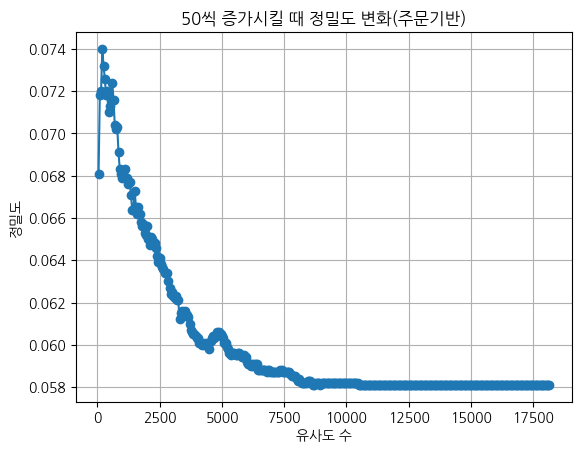

주문기반 최대 정밀도
200 개의 유사도를 반영할 때 정밀도: 0.074


In [14]:
x = [entry[0] for entry in Inv_param_50]
y = [entry[2]['정밀도'] for entry in Inv_param_50]

# 꺾은선 그래프 그리기
plt.plot(x, y, marker='o')

plt.title('50씩 증가시킬 때 정밀도 변화(주문기반)')
plt.xlabel('유사도 수')
plt.ylabel('정밀도')

# 그래프 표시
plt.grid(True)
plt.show()

print('주문기반 최대 정밀도')
print(x[np.argsort(y)[-1]],'개의 유사도를 반영할 때 정밀도:',max(y))

### 150~250개

In [13]:
Inv_param = []

print(recomm_n,'개 추천')
for i in range(150,251):
    pred = predict_count(pivot_IS, get_topsim(sim_Inv, top_n=i), IS = True)
    result = recomm_model(pred, recomm_n=recomm_n)
    Inv_param.append([i,'개의 유사도를 반영할 때',result[3]])

print('최대 정밀도', max(Inv_param, key=lambda x: x[2]['정밀도']))
Inv_param

7 개 추천
최대 정밀도 [229, '개의 유사도를 반영할 때', {'정밀도': 0.0749}]


[[150, '개의 유사도를 반영할 때', {'정밀도': 0.072}],
 [151, '개의 유사도를 반영할 때', {'정밀도': 0.0725}],
 [152, '개의 유사도를 반영할 때', {'정밀도': 0.0721}],
 [153, '개의 유사도를 반영할 때', {'정밀도': 0.0727}],
 [154, '개의 유사도를 반영할 때', {'정밀도': 0.0728}],
 [155, '개의 유사도를 반영할 때', {'정밀도': 0.0725}],
 [156, '개의 유사도를 반영할 때', {'정밀도': 0.0722}],
 [157, '개의 유사도를 반영할 때', {'정밀도': 0.0724}],
 [158, '개의 유사도를 반영할 때', {'정밀도': 0.0716}],
 [159, '개의 유사도를 반영할 때', {'정밀도': 0.0723}],
 [160, '개의 유사도를 반영할 때', {'정밀도': 0.0723}],
 [161, '개의 유사도를 반영할 때', {'정밀도': 0.0722}],
 [162, '개의 유사도를 반영할 때', {'정밀도': 0.0725}],
 [163, '개의 유사도를 반영할 때', {'정밀도': 0.0724}],
 [164, '개의 유사도를 반영할 때', {'정밀도': 0.0721}],
 [165, '개의 유사도를 반영할 때', {'정밀도': 0.0725}],
 [166, '개의 유사도를 반영할 때', {'정밀도': 0.0721}],
 [167, '개의 유사도를 반영할 때', {'정밀도': 0.0726}],
 [168, '개의 유사도를 반영할 때', {'정밀도': 0.0725}],
 [169, '개의 유사도를 반영할 때', {'정밀도': 0.0721}],
 [170, '개의 유사도를 반영할 때', {'정밀도': 0.072}],
 [171, '개의 유사도를 반영할 때', {'정밀도': 0.0724}],
 [172, '개의 유사도를 반영할 때', {'정밀도': 0.0722}],
 [173, '개의 유사도를 반영할 때', {'정밀도': 0.07

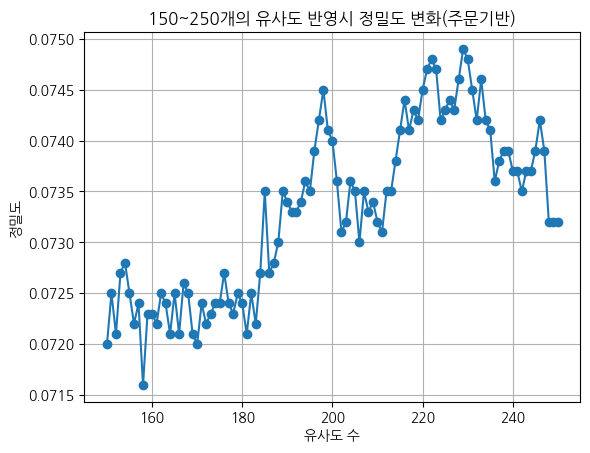

주문기반 최대 정밀도
229 개의 유사도를 반영할 때 정밀도: 0.0749


In [14]:
x = [entry[0] for entry in Inv_param]
y = [entry[2]['정밀도'] for entry in Inv_param]

# 꺾은선 그래프 그리기
plt.plot(x, y, marker='o')

plt.title('150~250개의 유사도 반영시 정밀도 변화(주문기반)')
plt.xlabel('유사도 수')
plt.ylabel('정밀도')

# 그래프 표시
plt.grid(True)
plt.show()

print('주문기반 최대 정밀도')
print(x[np.argsort(y)[-1]],'개의 유사도를 반영할 때 정밀도:',max(y))

## 고객유사도 기반 추천

### RFM 계산, scaling

In [15]:
RFM = train.copy()
RFM['InvoiceDate'] = pd.to_datetime(RFM['InvoiceDate']) #datetime 형식으로 변환
RFM['TotalPrice'] = RFM['Quantity'] * RFM['UnitPrice']

current_date = pd.Timestamp(RFM['InvoiceDate'].max()) + pd.Timedelta(days=1)
df_RFM = RFM.groupby('CustomerID').agg({
    'InvoiceDate' : (lambda x: (current_date - x.max()).days), # R
    'InvoiceNo' : 'count', # F
    'TotalPrice' : 'sum' # M
}) 

RFM_Scaler = MinMaxScaler()
df_RFM_scaled = RFM_Scaler.fit_transform(df_RFM)
df_RFM_scaled = pd.DataFrame(df_RFM_scaled, index =df_RFM.index, columns=df_RFM.columns )

In [16]:
df_CS = pd.DataFrame(train.loc[:,['CustomerID','StockCode']].value_counts())
df_CS['count'] = 1

pivot_CS = df_CS.pivot_table('count', index='CustomerID',columns='StockCode')
pivot_CS.fillna(0,inplace=True)

sim_Cust = pd.DataFrame(cosine_similarity(df_RFM_scaled),index=df_RFM_scaled.index, columns=df_RFM_scaled.index)

### 50개 단위

In [17]:
Cust_param_50 = []

print(recomm_n,'개 추천')
for i in range(50,4201,50):
    pred = predict_count(pivot_CS, get_topsim(sim_Cust, top_n=i))
    result = recomm_model(pred, recomm_n=recomm_n)
    Cust_param_50.append([i,'개의 유사도를 반영할 때',result[3]])

print('최대 정밀도', max(Cust_param_50, key=lambda x: x[2]['정밀도']))
Cust_param_50

7 개 추천
최대 정밀도 [350, '개의 유사도를 반영할 때', {'정밀도': 0.0419}]


[[50, '개의 유사도를 반영할 때', {'정밀도': 0.0396}],
 [100, '개의 유사도를 반영할 때', {'정밀도': 0.0396}],
 [150, '개의 유사도를 반영할 때', {'정밀도': 0.04}],
 [200, '개의 유사도를 반영할 때', {'정밀도': 0.04}],
 [250, '개의 유사도를 반영할 때', {'정밀도': 0.0399}],
 [300, '개의 유사도를 반영할 때', {'정밀도': 0.0412}],
 [350, '개의 유사도를 반영할 때', {'정밀도': 0.0419}],
 [400, '개의 유사도를 반영할 때', {'정밀도': 0.0407}],
 [450, '개의 유사도를 반영할 때', {'정밀도': 0.0395}],
 [500, '개의 유사도를 반영할 때', {'정밀도': 0.0393}],
 [550, '개의 유사도를 반영할 때', {'정밀도': 0.04}],
 [600, '개의 유사도를 반영할 때', {'정밀도': 0.0399}],
 [650, '개의 유사도를 반영할 때', {'정밀도': 0.0399}],
 [700, '개의 유사도를 반영할 때', {'정밀도': 0.0396}],
 [750, '개의 유사도를 반영할 때', {'정밀도': 0.0389}],
 [800, '개의 유사도를 반영할 때', {'정밀도': 0.0396}],
 [850, '개의 유사도를 반영할 때', {'정밀도': 0.0396}],
 [900, '개의 유사도를 반영할 때', {'정밀도': 0.0396}],
 [950, '개의 유사도를 반영할 때', {'정밀도': 0.0389}],
 [1000, '개의 유사도를 반영할 때', {'정밀도': 0.0389}],
 [1050, '개의 유사도를 반영할 때', {'정밀도': 0.0386}],
 [1100, '개의 유사도를 반영할 때', {'정밀도': 0.0383}],
 [1150, '개의 유사도를 반영할 때', {'정밀도': 0.0384}],
 [1200, '개의 유사도를 반영할 때', {'정밀도': 0.03

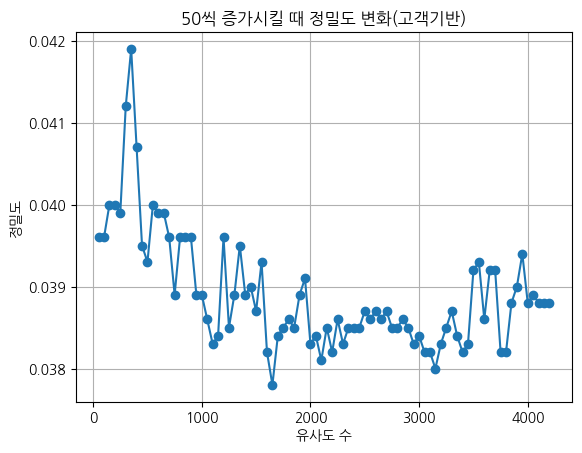

고객기반 최대 정밀도
350 개의 유사도를 반영할 때 정밀도: 0.0419


In [18]:
x = [entry[0] for entry in Cust_param_50]
y = [entry[2]['정밀도'] for entry in Cust_param_50]

# 꺾은선 그래프 그리기
plt.plot(x, y, marker='o')

plt.title('50씩 증가시킬 때 정밀도 변화(고객기반)')
plt.xlabel('유사도 수')
plt.ylabel('정밀도')

# 그래프 표시
plt.grid(True)
plt.show()

print('고객기반 최대 정밀도')
print(x[np.argsort(y)[-1]],'개의 유사도를 반영할 때 정밀도:',max(y))

### 300~400개

In [20]:
Cust_param = []

print(recomm_n,'개 추천')
for i in range(300,401):
    pred = predict_count(pivot_CS, get_topsim(sim_Cust, top_n=i))
    result = recomm_model(pred, recomm_n=recomm_n)
    Cust_param.append([i,'개의 유사도를 반영할 때',result[3]])

print('최대 정밀도', max(Cust_param, key=lambda x: x[2]['정밀도']))
Cust_param

7 개 추천
최대 정밀도 [314, '개의 유사도를 반영할 때', {'정밀도': 0.0422}]


[[300, '개의 유사도를 반영할 때', {'정밀도': 0.0412}],
 [301, '개의 유사도를 반영할 때', {'정밀도': 0.0411}],
 [302, '개의 유사도를 반영할 때', {'정밀도': 0.0412}],
 [303, '개의 유사도를 반영할 때', {'정밀도': 0.0408}],
 [304, '개의 유사도를 반영할 때', {'정밀도': 0.0409}],
 [305, '개의 유사도를 반영할 때', {'정밀도': 0.0412}],
 [306, '개의 유사도를 반영할 때', {'정밀도': 0.0413}],
 [307, '개의 유사도를 반영할 때', {'정밀도': 0.0413}],
 [308, '개의 유사도를 반영할 때', {'정밀도': 0.0416}],
 [309, '개의 유사도를 반영할 때', {'정밀도': 0.0416}],
 [310, '개의 유사도를 반영할 때', {'정밀도': 0.0412}],
 [311, '개의 유사도를 반영할 때', {'정밀도': 0.0418}],
 [312, '개의 유사도를 반영할 때', {'정밀도': 0.0418}],
 [313, '개의 유사도를 반영할 때', {'정밀도': 0.0419}],
 [314, '개의 유사도를 반영할 때', {'정밀도': 0.0422}],
 [315, '개의 유사도를 반영할 때', {'정밀도': 0.0421}],
 [316, '개의 유사도를 반영할 때', {'정밀도': 0.0419}],
 [317, '개의 유사도를 반영할 때', {'정밀도': 0.0419}],
 [318, '개의 유사도를 반영할 때', {'정밀도': 0.042}],
 [319, '개의 유사도를 반영할 때', {'정밀도': 0.0419}],
 [320, '개의 유사도를 반영할 때', {'정밀도': 0.0422}],
 [321, '개의 유사도를 반영할 때', {'정밀도': 0.0422}],
 [322, '개의 유사도를 반영할 때', {'정밀도': 0.0419}],
 [323, '개의 유사도를 반영할 때', {'정밀도': 0.0

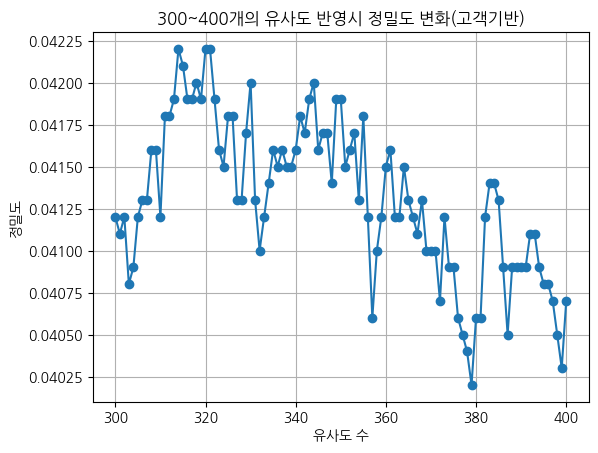

고객기반 최대 정밀도
314 개의 유사도를 반영할 때 정밀도: 0.0422


In [21]:
x = [entry[0] for entry in Cust_param]
y = [entry[2]['정밀도'] for entry in Cust_param]

# 꺾은선 그래프 그리기
plt.plot(x, y, marker='o')

plt.title('300~400개의 유사도 반영시 정밀도 변화(고객기반)')
plt.xlabel('유사도 수')
plt.ylabel('정밀도')

# 그래프 표시
plt.grid(True)
plt.show()

print('고객기반 최대 정밀도')
print(x[np.argsort(y)[-1]],'개의 유사도를 반영할 때 정밀도:',max(y))

## 아이템 유사도 기반

In [22]:
SD_pairs = train[['StockCode','Description']].groupby('StockCode')['Description'].apply(lambda x: list(set(x))).to_dict()
for stockcode, descriptions in SD_pairs.items(): #리스트형태의 데이터를 문자형으로 변환
    SD_pairs[stockcode] = ' '.join(descriptions)

In [23]:
Des_uniq = pd.Series(SD_pairs)
Des_uniq = Des_uniq.str.strip()
def replace_slash_with_space(text): #/를 공백으로 치환하는 함수
    return text.replace('/', ' ')
def remove_extra_spaces(text): #공백을 한칸으로 통일
    return re.sub(r'\s+', ' ', text)
Des_uniq = Des_uniq.apply(replace_slash_with_space)
Des_uniq = Des_uniq.apply(remove_extra_spaces)

In [24]:
Des_uniq_split = pd.Series(Des_uniq.str.split(" "))
Des_words = [word for sublist in Des_uniq_split for word in sublist]
uniq_words = set(Des_words)

print('삭제 전 단어 수:',len(uniq_words))

삭제 전 단어 수: 2265


In [25]:
# 영어 불용어 목록
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_special_characters(text): # 문자, 숫자, 공백을 제외한 모든 문자 삭제
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
uniq_words = {remove_special_characters(word) for word in uniq_words} # 특수 기호 삭제
uniq_words = {word for word in uniq_words if word.strip()} # 공백 또는 빈 문자열 삭제
uniq_words = {word for word in uniq_words if not word.isdigit()} #숫자 삭제
uniq_words -= stop_words # 불용어 삭제
print('삭제 후 단어 수:',len(uniq_words))

삭제 후 단어 수: 2154


In [27]:
df_Des = pd.DataFrame()
for word in uniq_words:
    pattern = r'(\b{}\b|^\w+ {}\b|\b{} \w+$)'.format(word, word, word) # 공백이나 문장부호와 함께 등장하는 단어를 포함하는 정규표현식

    # 정규표현식을 사용하여 해당 단어가 Description에 포함되어 있는지 여부를 확인
    df_Des[word] = Des_uniq.str.contains(pattern, regex=True).astype(int)

sim_Des = pd.DataFrame(cosine_similarity(df_Des),index=df_Des.index, columns=df_Des.index)

### 50개 단위

In [28]:
Item_param_50 = []

print(recomm_n,'개 추천')
for i in range(50,4001,50):
    sim = get_topsim(sim_Des, top_n= i)
    pred = pivot_CS.values.dot(sim.values) / np.array([np.abs(sim.values).sum(axis=1)])
    pred = pd.DataFrame(pred, index=pivot_CS.index, columns=pivot_CS.columns)
    result = recomm_model(pred, recomm_n=recomm_n)
    Item_param_50.append([i,'개의 유사도를 반영할 때',result[3]])

print('최대 정밀도',max(Item_param_50, key=lambda x: x[2]['정밀도']))
Item_param_50

7 개 추천
최대 정밀도 [750, '개의 유사도를 반영할 때', {'정밀도': 0.0297}]


[[50, '개의 유사도를 반영할 때', {'정밀도': 0.0236}],
 [100, '개의 유사도를 반영할 때', {'정밀도': 0.0234}],
 [150, '개의 유사도를 반영할 때', {'정밀도': 0.0231}],
 [200, '개의 유사도를 반영할 때', {'정밀도': 0.0233}],
 [250, '개의 유사도를 반영할 때', {'정밀도': 0.0243}],
 [300, '개의 유사도를 반영할 때', {'정밀도': 0.027}],
 [350, '개의 유사도를 반영할 때', {'정밀도': 0.0283}],
 [400, '개의 유사도를 반영할 때', {'정밀도': 0.0292}],
 [450, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [500, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [550, '개의 유사도를 반영할 때', {'정밀도': 0.0294}],
 [600, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [650, '개의 유사도를 반영할 때', {'정밀도': 0.0296}],
 [700, '개의 유사도를 반영할 때', {'정밀도': 0.0296}],
 [750, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [800, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [850, '개의 유사도를 반영할 때', {'정밀도': 0.0296}],
 [900, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [950, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [1000, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [1050, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [1100, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [1150, '개의 유사도를 반영할 때', {'정밀도': 0.0295}],
 [1200, '개의 유사도를 반영할 때', {'정밀도':

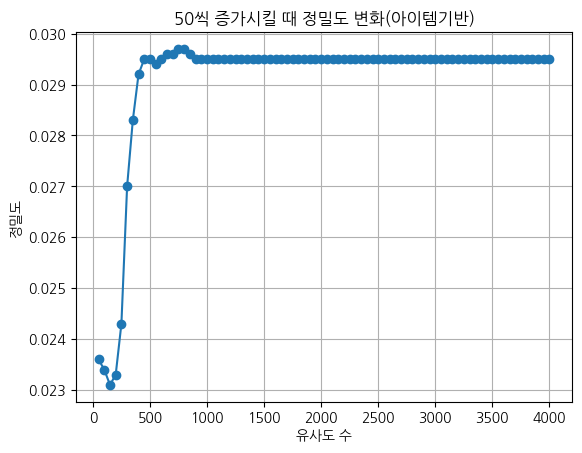

아이템기반 최대 정밀도
750 개의 유사도를 반영할 때 정밀도: 0.0297


In [29]:
x = [entry[0] for entry in Item_param_50]
y = [entry[2]['정밀도'] for entry in Item_param_50]

# 꺾은선 그래프 그리기
plt.plot(x, y, marker='o')

plt.title('50씩 증가시킬 때 정밀도 변화(아이템기반)')
plt.xlabel('유사도 수')
plt.ylabel('정밀도')

# 그래프 표시
plt.grid(True)
plt.show()

print('아이템기반 최대 정밀도')
print(x[np.argsort(y)[-1]],'개의 유사도를 반영할 때 정밀도:',max(y))

### 700~800개

In [30]:
Item_param = []

print(recomm_n,'개 추천')
for i in range(700,801):
    sim = get_topsim(sim_Des, top_n= i)
    pred = pivot_CS.values.dot(sim.values) / np.array([np.abs(sim.values).sum(axis=1)])
    pred = pd.DataFrame(pred, index=pivot_CS.index, columns=pivot_CS.columns)
    result = recomm_model(pred, recomm_n=recomm_n)
    Item_param.append([i,'개의 유사도를 반영할 때',result[3]])
    
print('최대 유사도',max(Item_param, key=lambda x: x[2]['정밀도']))
Item_param

7 개 추천
최대 유사도 [702, '개의 유사도를 반영할 때', {'정밀도': 0.0297}]


[[700, '개의 유사도를 반영할 때', {'정밀도': 0.0296}],
 [701, '개의 유사도를 반영할 때', {'정밀도': 0.0296}],
 [702, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [703, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [704, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [705, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [706, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [707, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [708, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [709, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [710, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [711, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [712, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [713, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [714, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [715, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [716, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [717, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [718, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [719, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [720, '개의 유사도를 반영할 때', {'정밀도': 0.0297}],
 [721, '개의 유사도를 반영할 때', {'정밀도': 0.0296}],
 [722, '개의 유사도를 반영할 때', {'정밀도': 0.0296}],
 [723, '개의 유사도를 반영할 때', {'정밀도': 0.

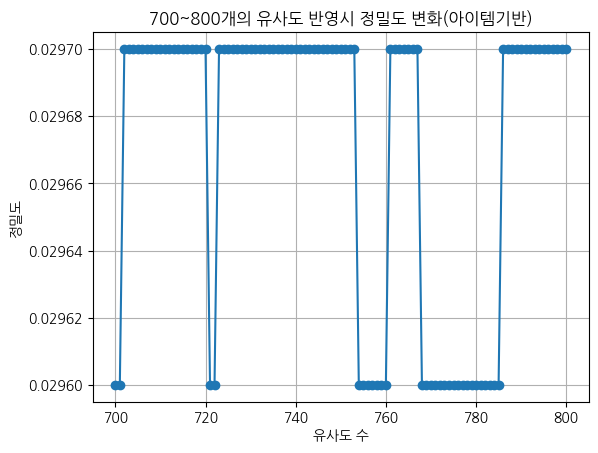

아이템기반 최대 정밀도
800 개의 유사도를 반영할 때 정밀도: 0.0297


In [31]:
x = [entry[0] for entry in Item_param]
y = [entry[2]['정밀도'] for entry in Item_param]

# 꺾은선 그래프 그리기
plt.plot(x, y, marker='o')

plt.title('700~800개의 유사도 반영시 정밀도 변화(아이템기반)')
plt.xlabel('유사도 수')
plt.ylabel('정밀도')

# 그래프 표시
plt.grid(True)
plt.show()

print('아이템기반 최대 정밀도')
print(x[np.argsort(y)[-1]],'개의 유사도를 반영할 때 정밀도:',max(y))

## 종합모델
- 주문 유사도 229개 반영(정밀도:0.0749)
- 고객 유사도 314개 반영(정밀도:0.0422)
- 아이템 유사도 800개 반영(정밀도:0.0297)

In [32]:
pred_IS = predict_count(pivot_IS, get_topsim(sim_Inv, top_n = 229), IS = True)
pred_CS = predict_count(pivot_CS, get_topsim(sim_Cust, top_n = 314))

topsim_Des = get_topsim(sim_Des, top_n= 800)
pred_Des = pivot_CS.values.dot(topsim_Des.values) / np.array([np.abs(topsim_Des.values).sum(axis=1)])
pred_Des = pd.DataFrame(pred_Des, index=pivot_CS.index, columns=pivot_CS.columns)

In [33]:
print(recomm_model(pred_IS, recomm_n = recomm_n)[3])
print(recomm_model(pred_CS, recomm_n = recomm_n)[3])
print(recomm_model(pred_Des, recomm_n = recomm_n)[3])

{'정밀도': 0.0749}
{'정밀도': 0.0422}
{'정밀도': 0.0297}


In [34]:
total_param = [] 

# 첫 번째 숫자 선택
for num1 in range(101): #2601번 실행
    # 두 번째 숫자 선택
    for num2 in range(num1 + 1):
        # 세 번째 숫자는 첫 번째와 두 번째 숫자를 뺀 나머지
        num3 = 100 - num1 - num2
        # 세 번째 숫자가 음수가 되면 다음 순서로 넘어감
        if num3 < 0:
            continue

        num_1 = num1/100
        num_2 = num2/100
        num_3 = num3/100

        precision = recomm_model((num_1*pred_IS + num_2*pred_CS + num_3*pred_Des), recomm_n = recomm_n)[3]
        total_param.append(['가중치 비율',[num_1, num_2, num_3], precision])

        print('가중치 비율',[num_1, num_2, num_3], precision)
        
print('\n 최대 정밀도:', max(total_param, key=lambda x: x[2]['정밀도']))


가중치 비율 [0.0, 0.0, 1.0] {'정밀도': 0.0297}
가중치 비율 [0.01, 0.0, 0.99] {'정밀도': 0.03}
가중치 비율 [0.01, 0.01, 0.98] {'정밀도': 0.0306}
가중치 비율 [0.02, 0.0, 0.98] {'정밀도': 0.0307}
가중치 비율 [0.02, 0.01, 0.97] {'정밀도': 0.0309}
가중치 비율 [0.02, 0.02, 0.96] {'정밀도': 0.0314}
가중치 비율 [0.03, 0.0, 0.97] {'정밀도': 0.0311}
가중치 비율 [0.03, 0.01, 0.96] {'정밀도': 0.0314}
가중치 비율 [0.03, 0.02, 0.95] {'정밀도': 0.0318}
가중치 비율 [0.03, 0.03, 0.94] {'정밀도': 0.0323}
가중치 비율 [0.04, 0.0, 0.96] {'정밀도': 0.0316}
가중치 비율 [0.04, 0.01, 0.95] {'정밀도': 0.0318}
가중치 비율 [0.04, 0.02, 0.94] {'정밀도': 0.0325}
가중치 비율 [0.04, 0.03, 0.93] {'정밀도': 0.0327}
가중치 비율 [0.04, 0.04, 0.92] {'정밀도': 0.0333}
가중치 비율 [0.05, 0.0, 0.95] {'정밀도': 0.0318}
가중치 비율 [0.05, 0.01, 0.94] {'정밀도': 0.0322}
가중치 비율 [0.05, 0.02, 0.93] {'정밀도': 0.0331}
가중치 비율 [0.05, 0.03, 0.92] {'정밀도': 0.0333}
가중치 비율 [0.05, 0.04, 0.91] {'정밀도': 0.0337}
가중치 비율 [0.05, 0.05, 0.9] {'정밀도': 0.0347}
가중치 비율 [0.06, 0.0, 0.94] {'정밀도': 0.0323}
가중치 비율 [0.06, 0.01, 0.93] {'정밀도': 0.0328}
가중치 비율 [0.06, 0.02, 0.92] {'정밀도': 0.0334}
가중치 

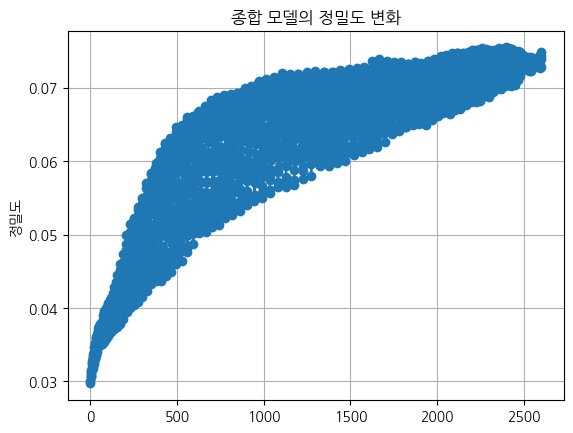

최대 정밀도 0.0755


In [35]:
x = range(len(total_param))
y = [entry[2]['정밀도'] for entry in total_param]

# 꺾은선 그래프 그리기
plt.plot(x, y, marker='o')

plt.title('종합 모델의 정밀도 변화')
plt.xlabel('')
plt.ylabel('정밀도')

# 그래프 표시
plt.grid(True)
plt.show()

print('최대 정밀도',max(y))